## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 4s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[5].shape

(28, 28)

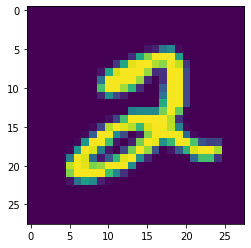

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

2

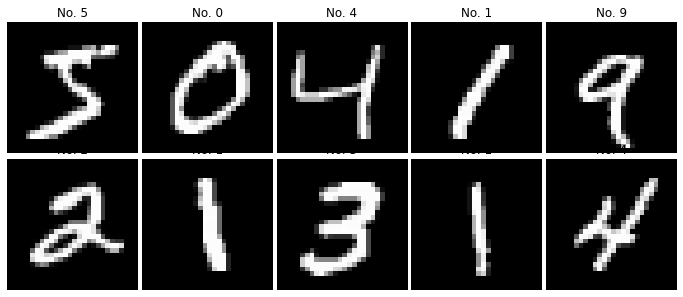

In [9]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [10]:
X_train[5].min()

0

In [11]:
X_train[5].max()

255

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
X_train[5].min()

0.0

In [14]:
X_train[5].max()

1.0

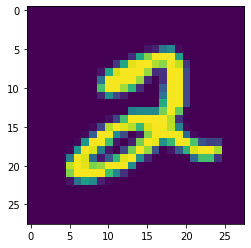

In [15]:
plt.imshow(X_train[5])

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

- valid : geçerli olanla devam et. bir değişiklik yapma

- same : filtrenizin ölçüsüne ve stride'ın ölçüsüne göre paddin yapar

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1497 - accuracy: 0.9549 - val_loss: 0.0617 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0487 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0419 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0416 - val_accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0546 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0460 - val_accuracy: 0.9884


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.history.history

{'accuracy': [0.9549333453178406,
  0.9844499826431274,
  0.9896833300590515,
  0.9936833381652832,
  0.9956166744232178,
  0.9967833161354065],
 'loss': [0.14974501729011536,
  0.05075898393988609,
  0.03222468122839928,
  0.020451681688427925,
  0.013598632998764515,
  0.009973736479878426],
 'val_accuracy': [0.9801999926567078,
  0.9846000075340271,
  0.9861000180244446,
  0.9861999750137329,
  0.9829000234603882,
  0.9883999824523926],
 'val_loss': [0.06168580427765846,
  0.04872468113899231,
  0.041942451149225235,
  0.04157893732190132,
  0.05463113263249397,
  0.04600144550204277]}

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.149745,0.954933,0.061686,0.9802
1,0.050759,0.984450,0.048725,0.9846
2,0.032225,0.989683,0.041942,0.9861
3,0.020452,0.993683,0.041579,0.9862
4,0.013599,0.995617,0.054631,0.9829


Text(0.5, 0, 'Epoch')

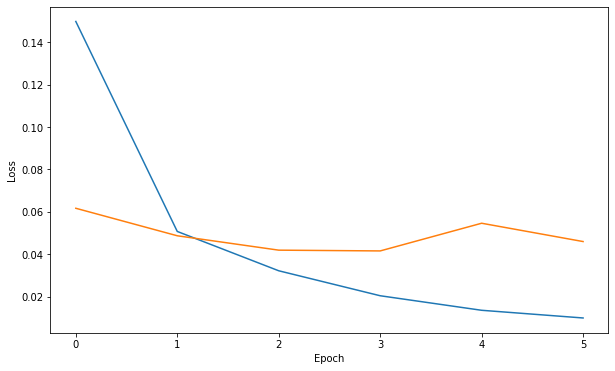

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

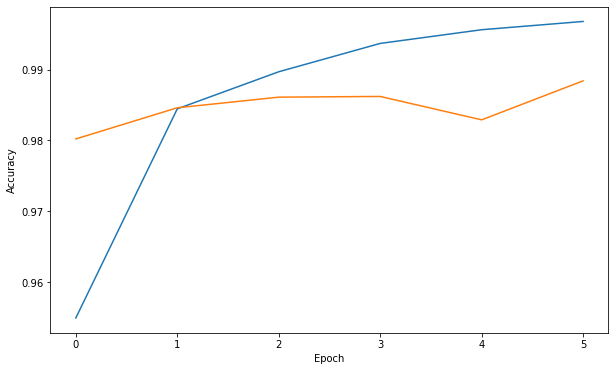

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

In [ ]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 7ms/step - loss: 0.0460 - accuracy: 0.9884
[0.04600144550204277, 0.9883999824523926]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
preds = model.predict(X_test)


In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 977    1    0    1    0    0    0    0    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    2 1018    1    0    0    0    5    4    1]
 [   0    0    3 1000    0    3    0    0    3    1]
 [   0    0    1    0  970    0    2    0    2    7]
 [   1    0    1    6    0  883    1    0    0    0]
 [   9    4    0    0    1    2  939    0    3    0]
 [   1    2    7    1    0    0    0 1012    1    4]
 [   4    0    4    1    0    0    0    1  958    6]
 [   0    3    0    1    6    4    0    1    0  994]]


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04600144550204277
Test accuracy: 0.9883999824523926


In [ ]:
my_number = X_test[0]

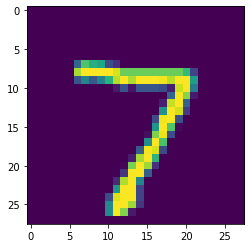

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.1184725e-10, 1.1800824e-08, 1.2832367e-08, 5.0861242e-08,
        9.8943485e-11, 4.3655555e-11, 8.7466443e-16, 1.0000000e+00,
        6.6198393e-09, 4.1492796e-09]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([7])

In [ ]:
model.save("cnn-1.h5")